# Aufgabe 2: Multi-Class Perceptrons

In [203]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs #for data generatio
from sklearn.preprocessing import OneHotEncoder

In [204]:
def plot_line_from_normal_vector_and_offset(normal_vector, offset, x_range=None, ax=None, **kwargs):
    """
    Plots a 2D line defined by its normal vector w and offset b such that wx + b = 0.

    Args:
        normal_vector (list or numpy.ndarray): A 2D vector representing the normal to the line (w). Must be of length 2.
        offset (float): The offset (b) such that w.x + b = 0.
        x_range (tuple, optional): A tuple (xmin, xmax) specifying the range of x-values to plot.
                                     If None (default), a reasonable range is automatically determined.
        ax (matplotlib.axes._axes.Axes, optional): The matplotlib axes object to plot on. If None (default),
                                                  the current axes (plt.gca()) is used, or a new figure and axes
                                                  are created.
        **kwargs: Keyword arguments to pass to the `plot` function (e.g., color, linestyle, linewidth).

    Returns:
        matplotlib.lines.Line2D: The line object created by `ax.plot`.
    """
    normal_vector = np.array(normal_vector)  # Ensure it's a NumPy array for calculations

    if normal_vector.shape != (2,):
        raise ValueError("Normal vector must be a 2D vector (length 2).")

    w1, w2 = normal_vector

    if ax is None:
        fig, ax = plt.subplots()

    if x_range is None:
        # Determine a reasonable x-range
        xmin = -5
        xmax = 5
        x_range = (xmin, xmax)

    xmin, xmax = x_range
    x = np.linspace(xmin, xmax, 100)  # Generate x-values

    if w2 != 0:
        y = (-w1 * x - offset) / w2  # Solve for y: w1*x + w2*y + b = 0  =>  y = (-w1*x - b) / w2
    else:
        # Handle the case where the line is vertical (w2=0). Plot a vertical line.
        if w1 == 0:
            raise ValueError("Cannot plot line with w1=0 and w2=0.")
        x = np.full_like(x, -offset / w1)  # x is constant for a vertical line
        y = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100)  # generate y values spanning the current y-axis.



    line, = ax.plot(x, y, **kwargs)

    return line

In [205]:
X, y = make_blobs(n_samples=50, centers=3, cluster_std=0.2,n_features=2,center_box=(1,5),random_state=104)

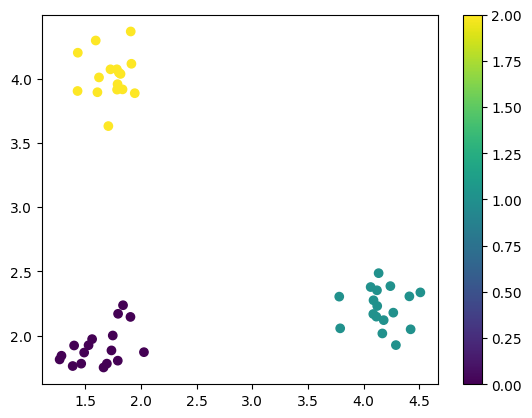

In [206]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.colorbar()

### draw Percepton layout
* Hint: now we have more then one Perceptron
* write math. formulation as linear model

In [207]:
# W = [w1,w2,w3]
# B = [b1,b2,b3]

### Transform lables to one-hot coding
* Hint: Use Scikit-Learn

In [208]:
enc = OneHotEncoder(handle_unknown='ignore')
y_encoded = enc.fit_transform(y.reshape(-1,1)).toarray()
y_encoded[y_encoded == 0] = -1
y_encoded


array([[ 1., -1., -1.],
       [-1.,  1., -1.],
       [-1., -1.,  1.],
       [-1.,  1., -1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1.,  1., -1.],
       [ 1., -1., -1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [ 1., -1., -1.],
       [-1., -1.,  1.],
       [ 1., -1., -1.],
       [-1.,  1., -1.],
       [-1.,  1., -1.],
       [ 1., -1., -1.],
       [ 1., -1., -1.],
       [-1.,  1., -1.],
       [-1.,  1., -1.],
       [ 1., -1., -1.],
       [-1., -1.,  1.],
       [-1.,  1., -1.],
       [-1., -1.,  1.],
       [-1.,  1., -1.],
       [-1.,  1., -1.],
       [-1.,  1., -1.],
       [ 1., -1., -1.],
       [-1.,  1., -1.],
       [-1., -1.,  1.],
       [-1.,  1., -1.],
       [-1., -1.,  1.],
       [ 1., -1., -1.],
       [ 1., -1., -1.],
       [-1.,  1., -1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [ 1., -1., -1.],
       [-1., -1.,  1.],
       [ 1., -1., -1.],
       [ 1., -1., -1.],
       [-1., -1.

### Manually find parameters $w$ and $b$ for
* for each Perceptron seperately
* then combine to single matrix multiplication formulation

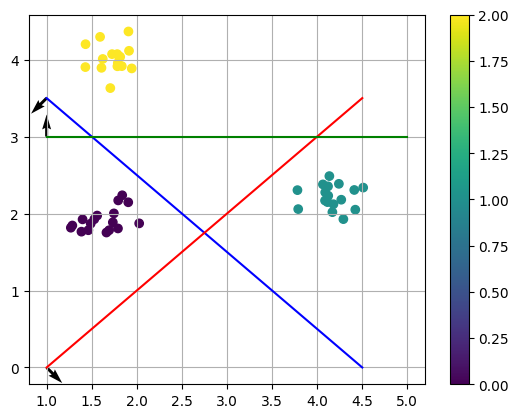

In [209]:
#part 1: find slopes and intercepts by using the visualization
w1=np.array([-1,-1])
b1=4.5
w2=np.array([1,-1])
b2=-1
w3=np.array([0,1])
b3=-3

# combine slopes and intercepts to a matrix
W = np.array([w1,w2,w3])
B = np.array([b1,b2,b3])

# create a plot for all parts
fig, ax = plt.subplots()
plt.scatter(X[:,0],X[:,1],c=y)
plt.colorbar()

# add the lines to the plot
line1 = plot_line_from_normal_vector_and_offset(w1, b1, color='blue', x_range=[1,4.5], ax=ax)
line2 = plot_line_from_normal_vector_and_offset(w2, b2, color='red', x_range=[1,4.5], ax=ax)
line3 = plot_line_from_normal_vector_and_offset(w3, b3, color='green', x_range=[1,5], ax=ax)


plt.quiver(1,b1-1,w1[0],w1[1])
plt.quiver(1,b2+1,w2[0],w2[1])
plt.quiver(1,3,w3[0],w3[1])
plt.grid()
plt.show()

In [210]:
# combine the matrix of W and B to a formular
predicts = W.dot(X.T)+B.reshape(3, 1)

#### test single perceptrons by class


In [211]:
i=0
print(W.dot(X[i,:].T)+B)
print (y_encoded[i],np.sign(W.dot(X[i,:].T)+B))
y_encoded[i]==np.sign(W.dot(X[i,:].T)+B)



[ 0.96576369 -1.41375433 -1.02600468]
[ 1. -1. -1.] [ 1. -1. -1.]


array([ True,  True,  True])

#### test full Setup

In [212]:
y_encoded==np.sign(predicts).T

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ T

## Add non-linear activation / loss -> $softmax$
* implement a $softmax$ function
* replace $sgn$ by $softmax$
* plot confidence of the test samples

In [213]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""

    exps = np.exp(x - np.max(x, axis=0, keepdims=True))
    probs = exps / np.sum(exps, axis=0, keepdims=True)

    return probs


In [214]:
predicts_softmax = softmax(predicts).T
print("Confidence of test sampels:", predicts_softmax)

Confidence of test sampels: [[0.81363714 0.07533889 0.11102397]
 [0.05381493 0.7444566  0.20172846]
 [0.18317461 0.02271164 0.79411375]
 [0.09525892 0.76188512 0.14285596]
 [0.08468409 0.01091105 0.90440486]
 [0.10417953 0.01091977 0.8849007 ]
 [0.03000223 0.83223851 0.13775926]
 [0.6818645  0.11006049 0.208075  ]
 [0.12897586 0.01314013 0.857884  ]
 [0.10625443 0.01541397 0.87833161]
 [0.86161615 0.06559203 0.07279181]
 [0.10127632 0.01620223 0.88252146]
 [0.68657611 0.12666749 0.18675639]
 [0.0402193  0.83572004 0.12406066]
 [0.05349348 0.77903119 0.16747533]
 [0.78908609 0.10344824 0.10746567]
 [0.8881383  0.0458754  0.0659863 ]
 [0.05121545 0.79712227 0.15166228]
 [0.04553738 0.72693424 0.22752838]
 [0.81489395 0.0983773  0.08672876]
 [0.08026878 0.01159842 0.9081328 ]
 [0.03959731 0.78063993 0.17976276]
 [0.0635269  0.00627722 0.93019587]
 [0.08849943 0.69604328 0.21545729]
 [0.04762235 0.83245865 0.119919  ]
 [0.04051589 0.88222791 0.0772562 ]
 [0.764524   0.10261463 0.13286137]
